# Template for Mg-Fe diffusion calculations

Simon Matthews, University of Iceland (simonm@hi.is)

First import the diffuse package (and other useful packages):

In [7]:
import diffuse as d
import numpy as np
import matplotlib.pyplot as plt

To run a calculation that matches exactly the type laid out by Dauphas et al. (2010), there is a wrapper around the numerical methods. You can see the docstring for information on the inputs and outputs:

In [2]:
d.run_dauphas_model?

Signature:
d.run_dauphas_model(
    XMg0=0.94,
    XMg1=0.89,
    a=0.0003,
    beta_Fe=0.05,
    beta_Mg=0.05,
    T0=1853.0,
    c=30.0,
    Tlinear=True,
    P=100000.0,
    Delta_fO2=0.0,
    n_tau_end=3.0,
    xsteps=100,
    tsteps=10000,
    print_updates=True,
)
Docstring:
Run a complete set of diffusion models in the format set up by
Dauphas et al. (2010) needed to calculate the fractionation in
both Mg and Fe isotopes.

Parameters
----------
XMg0 : float, default: 0.94
    The mole fraction of Mg in the crystal at the start.
XMg1 : float, default: 0.89
    The mole fraction of Mg at the edge of the crystal througout
    the model run.
a : float, default: 300e-6
    The crystal radius in m
beta_Fe : float, default: 0.05
    The beta value relating the diffusivities of 56Fe and 54Fe
beta_Mg : float, default: 0.05
    The beta value relating the diffusivities of 26Mg and 24Mg
T0 : float, default: 1853.0
    The starting temperature in K
c : float, default: 30.0
    The time cons

The default values will recreate the results shown in Fig. 10 of Dauphas et al. (2010). 

You can specify different values here:

In [3]:
results = d.run_dauphas_model(
    XMg0=0.94, # Fo of olivine at start
    XMg1=0.89, # Fo of olivine boundary throughout model
    a=300e-6, # The radius of the crystal in m
    beta_Fe=0.05, 
    beta_Mg=0.05,
    T0=1853.0, # The starting T
    c=30.0, # The constant controlling T evolution
    Tlinear=True, # linear or exponential cooling?
    P=1e5, # The pressure in Pa
    Delta_fO2=0.0, # Delta log(fO2) relative to NNO
    n_tau_end=3.0, # Duration of model in multiples of diffusive timescale
    xsteps=100, # x steps, increasing will make the compute time much longer
    tsteps=10000, # time steps, needs to be high enough for the numerical approximation to be valid
    print_updates=True # Receive some updates while it is running the calculations,
)

Let's model some Mg-Fe diffusion in olivine!

This routine recreates the model outlined
by Dauphas et al. (2010)

Diffusive timescale: 49.43 days
Starting 54Fe...
Finished 54Fe! Starting 56Fe...
Finished 56Fe! Starting 24Mg...
Finished 24Mg! Starting 26Mg...
Finished 26Mg! All done.


The results object has the following parameters stored in it:

In [4]:
results.keys()

dict_keys(['Fo', 'dFe', 'dMg', 'tau', 'T', 't', 'r', 'bulk_dFe', 'bulk_dMg'])

The meaning of each of these:
- 'Fo': The olivine Fo content
- 'dFe': delta 56Fe
- 'dMg': delta 26Mg
- 'tau': diffusive time constant in days
- 'T': temperature over time, in K
- 't': time in days
- 'r': distance from crystal centre in um
- 'bulk_dFe': bulk dFe values over time
- 'bulk_dMg': bulk dMg values over time

Looking at the content of the dFe:

In [5]:
results['dFe']

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.66133815e-13,  6.66133815e-13,  2.22044605e-13, ...,
        -3.63113490e-01, -2.87888560e-01,  0.00000000e+00],
       [ 4.44089210e-13,  2.22044605e-13, -2.22044605e-13, ...,
        -1.84376047e-01,  8.61770928e-02,  0.00000000e+00],
       ...,
       [-5.62427558e-01, -5.62495312e-01, -5.62832736e-01, ...,
        -1.55581769e-02, -7.64726279e-03,  0.00000000e+00],
       [-5.62427558e-01, -5.62495312e-01, -5.62832736e-01, ...,
        -1.55581769e-02, -7.64726279e-03,  0.00000000e+00],
       [-5.62427558e-01, -5.62495312e-01, -5.62832736e-01, ...,
        -1.55581769e-02, -7.64726279e-03,  0.00000000e+00]])

In [8]:
np.shape(results['dFe'])

(10001, 100)

It is a 2D array, where the first index is the time, and the second is the x position.

For example, to plot the dFe profile at a particular timestep:

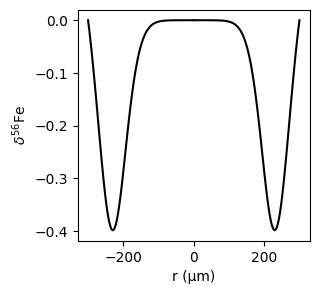

In [13]:
fig, ax = plt.subplots(figsize=(3,3))

ax.plot(results['r'], results['dFe'][50,:], c='k')
ax.plot(-results['r'], results['dFe'][50,:], c='k')

ax.set_xlabel('r (µm)')
ax.set_ylabel('$\delta^{56}$Fe')

plt.show()

Note that I repeated the plot line so that we see the crystal from rim to rim. The `50` means it is plotting timestep 50. We can see what time this corresponds to:

In [17]:
print(f'{results["t"][50]:.3f} days')

0.741 days


You could do similar for Fo and $\delta^{26}$ Mg.

We could also plot the bulk isotope ratios and Temperature over time:

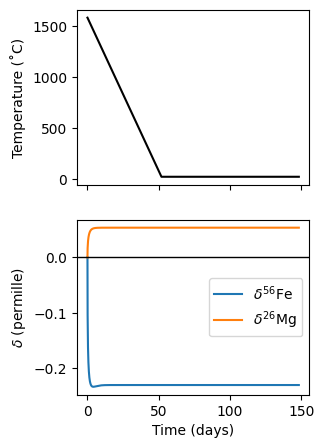

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(3,5), sharex='col')

ax[0].plot(results['t'], results['T'] - 273.15,
           c='k')

ax[1].plot(results['t'], results['bulk_dFe'],
        label="$\delta^{56}$Fe")

ax[1].plot(results['t'], results['bulk_dMg'],
        label="$\delta^{26}$Mg")

ax[1].axhline(0, c='k', lw=1)

ax[1].set_ylabel('$\delta$ (permille)')
ax[1].set_xlabel('Time (days)')
ax[0].set_ylabel('Temperature (˚C)')

ax[1].legend()

plt.show()

We could also replicate Fig. 10 of Dauphas et al. (2010):

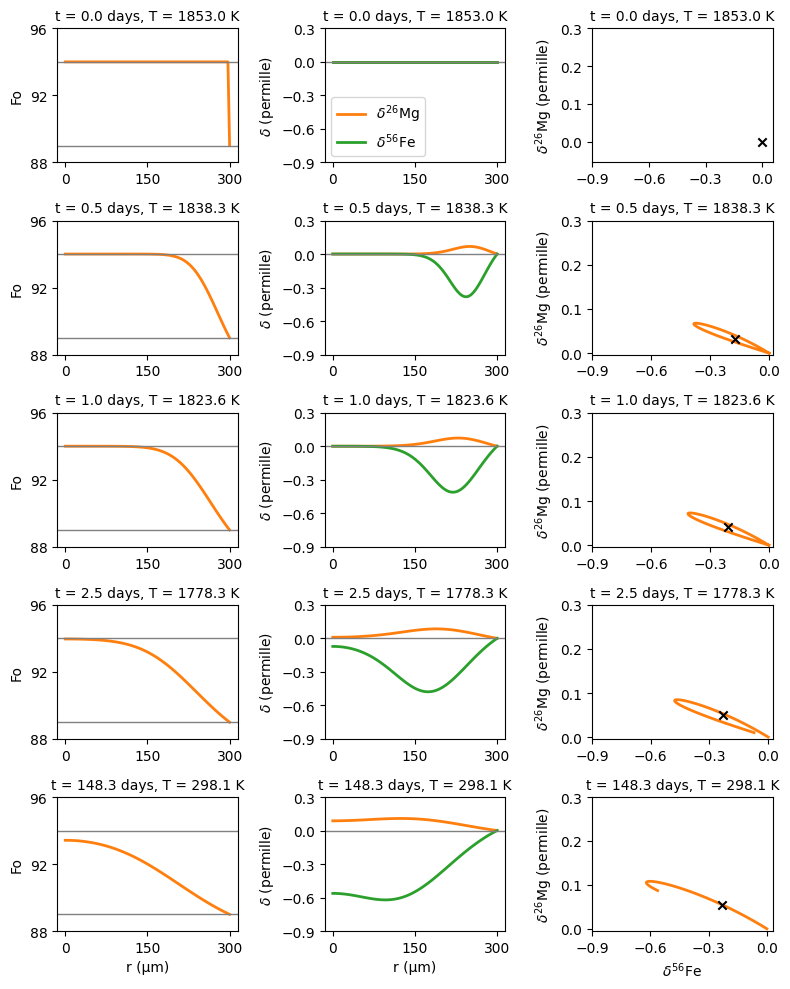

In [32]:
fig, ax = plt.subplots(5,3, figsize=(8, 10))

timesteps = [0, 33, 66, 168, -1]


k = 0
for i in range(5):
    for j in range(3):
        ax[i,j].set_title(f't = {results["t"][timesteps[i]]:.1f} days, T = {results["T"][timesteps[i]]:.1f} K',
                          fontsize=10)
        k += 1

    ax[i,0].plot(results['r'], 
                 results['Fo'][timesteps[i],:], c='C1', lw=2)
    ax[i,0].axhline(results['Fo'][0,0], c='0.5', lw=1)
    ax[i,0].axhline(results['Fo'][0,-1], c='0.5', lw=1)
    ax[i,0].set_ylabel('Fo')

    ax[i,1].plot(results['r'], 
                 results['dMg'][timesteps[i],:], 
                 c='C1', lw=2, label='$\delta^{26}$Mg')
    ax[i,1].plot(results['r'], 
                 results['dFe'][timesteps[i],:], 
                 c='C2', lw=2, label='$\delta^{56}$Fe')
    ax[i,1].axhline(0, c='0.5', lw=1)
    ax[i,1].set_ylabel('$\delta$ (permille)')

    ax[i,2].plot(results['dFe'][timesteps[i],:], 
                 results['dMg'][timesteps[i],:],
                 c='C1', lw=2)
    ax[i,2].scatter(results['bulk_dFe'][timesteps[i]], 
                    results['bulk_dMg'][timesteps[i]], 
                    c='k', marker='x',zorder=10)
    ax[i,2].set_ylabel('$\delta^{26}$Mg (permille)')


for axis in ax[:,0]:
    axis.set_xticks([0, 150, 300])
    axis.set_yticks([88, 92, 96])

for axis in ax[:,1]:
    axis.set_xticks([0, 150, 300])
    axis.set_yticks([-0.9, -0.6, -0.3, 0.0, 0.3])

for axis in ax[:,2]:
    axis.set_xticks([-0.9, -0.6, -0.3, 0.0])
    axis.set_yticks([0, 0.1, 0.2, 0.3])

ax[4,0].set_xlabel('r (µm)')
ax[4,1].set_xlabel('r (µm)')
ax[4,2].set_xlabel('$\delta^{56}$Fe')

ax[0,1].legend()

fig.tight_layout()

plt.show()